# Evaluation procedure 1 : Train & Test on the entire dataset

# Logistic regression

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()
X_train = iris.data
y_train = iris.target

logreg = LogisticRegression(solver='liblinear')

logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [5]:
y_pred = logreg.predict(X_train)
print(y_pred )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Evaluation metric : Accuracy, which is the propotion of correct predictions 

In [7]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_pred))
#The result is called training accuracy because we're testing the model on the same data we used to train it

0.96


# KNN (K=5)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred))

0.9666666666666667


# KNN (K=1)

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred))
#A KNN with neighbours 1 will always have 100% training accuracy, to make a prediction it will always look for the closest 
#set which in this case will be the set itself since it memorized all the training sets we trained it to.
#We conclude that training and testing on the same data is not a useful procedure to decide which model to choose
#this model is not surely generelized for out-of-sample data.. if what we are trying to maximize is only training accurracy 
#and not testin_accuracy then we are rewarding overly-complexe models that won't necesseraly generalize to futur cases.
#In other words, models with high training accuracy might not actually do well with out-of-sample data

1.0


# Training accuracy vs. Testing accuracy

When training a machine learning model, one of the main things that you want to avoid would be overfitting. This is when your model fits the training data well, but it isn't able to generalize and make accurate predictions for data it hasn't seen before.

To find out if their model is overfitting, data scientists use a technique called cross-validation, where they split their data into two parts - the training set, and the validation set. The training set is used to train the model, while the validation set is only used to evaluate the model's performance.

Metrics on the training set let you see how your model is progressing in terms of its training, but it's metrics on the validation set that let you get a measure of the quality of your model - how well it's able to make new predictions based on data it hasn't seen before.

With this in mind, loss and acc are measures of loss and accuracy on the training set, while val_loss and val_acc are measures of loss and accuracy on the validation set.

At the moment your model has an accuracy of ~86% on the training set and ~84% on the validation set. This means that you can expect your model to perform with ~84% accuracy on new data.

I notice that as your epochs goes from 23 to 25, your acc metric increases, while your val_acc metric decreases. This means that your model is fitting the training set better, but is losing its ability to predict on new data, indicating that your model is starting to fit on noise and is beginning to overfit.

So that is a quick explanation on validation metrics and how to interpret them.

Source :  https://stackoverflow.com/questions/51344839/what-is-the-difference-between-the-terms-accuracy-and-validation-accuracy#:~:text=The%20training%20set%20is%20used,to%20evaluate%20the%20model's%20performance.

# Evaluation procedure 2 : Train & Test Split, Test Set approach, Validation Set approach

In [11]:

# print the shapes of X and y
print(X_train.shape)
print(y_train.shape)

(150, 4)
(150,)


In [13]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.4, random_state=4)

In [14]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [15]:
# STEP 2: train the model on the training set
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [16]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [28]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 46))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

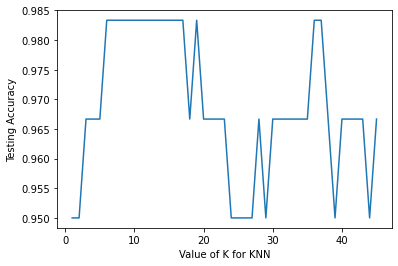

In [29]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [33]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9833333333333333

In general as the value of K increases, there appears to be a rise in the testing accuracy and then a fall!  its quite typical
when examining a relationship betweena model complexity and testing accuracy.
As we know training accuracy rises as a model complexity increases(in KNN the complexity is determined by K), but testing accuracy on the other hand penalizes model that are too complexe as well as models that are not complexe enough, therefour we 
see maximum testing accuracy when the model has just the right level of complexity, in this case we can see thehighest accuracy
from k=6 to k=17.

But because the dataset is small its hard to say if the model is going to generelize

In final it's important to retrain our model on all the available training data, otherwise we'll be throwing away valuable training data 

# Making predictions on out-of-sample data

In [34]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# train the model with X and y (not X_train and y_train)
X = iris.data
y = iris.target
knn.fit(X, y)

# make a prediction for an out-of-sample observation
knn.predict([[3, 5, 4, 2]])

array([1])

# Cons of train_test_split ?

Provides a high variance estimate of out-of-sample accuracy, meaning that it can change a lot depending on which observations happen to be on the training set vs. the testing set, that where we can use an alternative model evaluation procedure called cross validation that largly oversomes this limitation by repeating the train_test_split multiple times in a systematic way and averaging the results

https://www.quora.com/What-is-an-intuitive-explanation-of-over-fitting-particularly-with-a-small-sample-set-What-are-you-essentially-doing-by-over-fitting-How-does-the-over-promise-of-a-high-R%C2%B2-low-standard-error-occur/answer/Jessica-Su

http://scott.fortmann-roe.com/docs/BiasVariance.html

# Other Model Evaluation Procedures

**Confidence Interval.** Confidence intervals are used to assess how reliable a statistical estimate is. Wide confidence intervals mean that your model is poor (and it is worth investigating other models), or that your data is very noisy if confidence intervals don’t improve by changing the model (that is, testing a different theoretical statistical distribution for your observations.) Modern confidence intervals are model-free, data -driven: click here to see how to compute them. A more general framework to assess and reduce sources of variance is called analysis of variance. Modern definitions of variance have a number of desirable properties. 

**Confusion Matrix.** Used in the context of clustering. These N x N matrices (where N is the number of clusters) are designed as followed: the element in cell (i, j) represents the number of observations, in the test training set (as opposed to the control training set, in a cross-validation setting) that belong to cluster i and are assigned (by the clustering algorithm) to cluster j. When these numbers are transformed into proportions, these matrices are sometimes called contingency tables. A wrongly assigned observation is called false positive (non-fraudulent transaction erroneously labelled as fraudulent) or false negative (fraudulent transaction erroneously labelled as non- fraudulent). The higher the concentration of observations in the diagonal of the confusion matrix, the higher the accuracy / predictive power of your clustering algorithm.

**Gain and Lift Chart.** Lift is a measure of the effectiveness of a predictive model calculated as the ratio between the results obtained with and without the predictive model. Cumulative gains and lift charts are visual aids for measuring model performance. Both charts consist of a lift curve and a baseline. Click here for details. 

**Kolmogorov-Smirnov Chart.** This non-parametric statistical test is used to compare two distributions, to assess how close they are to each other. In this context, one of the distributions is the theoretical distribution that the observations are supposed to follow (usually a continuous distribution with one or two parameters, such as Gaussian law), while the other distribution is the actual, empirical, parameter-free, discrete distribution computed on the observations.

**Chi Square.** It is another statistical test similar to Kolmogorov-Smirnov, but in this case it is a parametric test. It requires you to aggreate observations in a number of buckets or bins, each with at least 10 observations. 

**ROC curve.** Unlike the lift chart, the ROC curve is almost independent of the response rate. The receiver operating characteristic (ROC), or ROC curve, is a graphical plot that illustrates the performance of a binary classifier system as its discrimination threshold is varied. The curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity or the sensitivity index d’, known as “d-prime” in signal detection and biomedical informatics, or recall in machine learning. The false-positive rate is also known as the fall-out and can be calculated as (1 – specificity). The ROC curve is thus the sensitivity as a function of fall-out. Click here for details. 

**Gini Coefficient. ** The Gini coefficient is sometimes used in classification problems.  Gini = 2*AUC  – 1, where AUC is the area under the curve (see the ROC curve entry above). A Gini ratio above 60% corresponds to a good model. Not to be confused with the Gini index or Gini impurity, used when building decision trees.

**Root Mean Square Error.** RMSE is the must used and abused metric to compute goodness of fit. It is defined as the square root of the absolute value of the correlation coefficient between true values and predicted values, and widely used by Excel users.

**L^1 version of RSME.** The RSME metric (see above entry) is an L^2 metric, sensitive to outliers. Modern metrics are L^1 and sometimes based on rank statistics rather than raw data. One of these new metrics, developed by our data scientist, is described here.  

**Cross Validation.** This is a general framework to assess how a model will perform in the future; it is also used for model selection. It consists of splitting your training set into test and control data sets, training your algorithm (classifier, or predictive algorithm) on the control data set, and testing it on the test data set. Since the true values are known on the test data set, you can compare them with your predicted values, using one of the other comparison tools mentioned in this article. Usually the test data set itself is split into multiple subsets or data bins, to compute confidence intervals for predicted values. The test data set must be carefully selected, and must include different time frames and different types of observations (compared with the control data set), each with enough data points, in order to get sound, reliable conclusions as how the model will perform on future data, or on data that has slightly involved. Another idea is to introduce noise in the test data set and see how it impacts prediction: this is referred to as model sensitivity analysis. 

**Predictive Power.** This metric was developed internally at Data Science Central by our data scientist. It is related to the concept of entropy or the Gini index mentioned above in this article. It was designed as a synthetic metric satisfying interesting properties, and used to select a good subset of features in any machine learning project, or as a criterion to decide which node to split at each iteration, when building decision trees. Click here for details.